# Курсовая работа
## Выполнил студент группы БФИ2202 Омаров Андрей

Написать программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине. Данные в файле содержатся в следующем формате:

| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена за единицу | Общая стоимость |

Необходимо:
1.	Рассчитать общую выручку магазина.
2.	Найти товар, который был продан наибольшее количество раз.
3.	Найти товар, который принес наибольшую выручку.
4.	Составить отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товара и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск. Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в соответствии с требованиями.


# Ход работы:

In [2]:
import csv
from copy import deepcopy
import matplotlib.pyplot as plt

Создание класса хеш-таблиц:

In [4]:
class Node:
    def __init__(self, key, value):
        self.key = key
        self.value = int(value)
        self.next = None

class HashTable:
    def __init__(self):
        self.capacity = 10 # начальная емкость таблицы
        self.size = 0 # количество элементов в таблице
        self.buckets = [None] * self.capacity # создаем пустые списки для каждой ячейки таблицы

    def add(self, key, value):
        index = hash(key) % self.capacity
        node = self.buckets[index]
        while node:
            if node.key == key:
                node.value += int(value)
                return
            node = node.next
        new_node = Node(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()

    def get(self, key):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ найден, возвращаем его значение
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None
    
    def remove(self, key):
        index = hash(key) % self.capacity # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index] # получаем список (цепочку) элементов по индексу
        prev = None
        while node: # проходим по всем элементам цепочки
            if node.key == key: # если ключ найден, удаляем элемент
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next
  
    def resize(self):
        new_capacity = self.capacity * 2 # увеличиваем емкость вдвое
        new_buckets = [None] * new_capacity # создаем новую таблицу с увеличенной емкостью
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = Node(node.key, node.value)
                else:
                    new_buckets[index] = Node(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

Функция быстрой сортировки:

In [5]:
def qsort(matrix):
    if len(matrix) <= 1:
        return matrix
    else:
        base = matrix[0]
        left = [x for x in matrix[1:] if x < base] # элементы меньше первого
        right = [x for x in matrix[1:] if x >= base] # элементы больше первого
        return qsort(left) + [base] + qsort(right)

Функция сортировки Шелла:

In [6]:
def shell(arr): 
    h = len(arr) // 2 # шаг
    while h > 0:
        for i in range(h, len(arr)): # проходим по всем элементам с шагом
            j = i
            delta = j - h
            while delta >= 0 and arr[delta] > arr[j]: # пока не получили индекс больше длины массива
                arr[delta], arr[j] = arr[j], arr[delta]
                j = delta
                delta = j - h
        h //= 2 
    return arr

Основная часть программы с расчетами:

In [7]:
total_revenue = 0 # общая выручка
total_sales = 0 # всего продано

table_sales = HashTable()
table_revenue = HashTable()

names = [] # названия товаров
sales= [] # количество проданных товаров
revenues = [] # выручка по каждому товару
unique = [] # массив для хранения 

try:
    with open('Data.csv') as f:
        reader = csv.reader(f, delimiter = ';')
        for row in reader:
            if str(row[0]) not in unique:
                unique.append(str(row[0]))
            else:
                continue # пропускаем строку если номер заказа повторился
            if not ((str(row[4]).isdecimal() and int(row[4])>0) and str(row[6]).isdigit() and int(row[6]) > 0 and row[2].isalpha()):
                continue # пропускаем строку если введены некорректные данные
            total_revenue += int(row[6])
            total_sales += int(row[4])       
            table_sales.add(str(row[2]), int(row[4]))
            table_revenue.add(str(row[2]), int(row[6]))
        
            if row[2] not in names:
                names.append(row[2])
except:
    print("Файл с таким именем не найден")

# заполним массивы
for name in names:
    sales.append(table_sales.get(name))
    revenues.append(table_revenue.get(name))


sales_sorted = deepcopy(sales)
revenues_sorted = deepcopy(revenues)

# отсортируем массивы для поиска максимальных значений
sales_sorted = qsort(sales_sorted)
revenues_sorted = shell(revenues_sorted)

# все товары с максимальными значениями выручки и общим количеством продаж
popular_sales = []
popular_revenue = []

# для диаграмм
explode_sales = []
explode_revenue = []

for name in names:
    if table_sales.get(name) == sales_sorted[-1]:
        popular_sales.append(name)
        explode_sales.append(0.1)
    else:
        explode_sales.append(0)
    if table_revenue.get(name) == revenues_sorted[-1]:
        popular_revenue.append(name)
        explode_revenue.append(0.1)
    else:
        explode_revenue.append(0)


Вывод результата:

In [8]:
print(f"Общая выручка магазина составила {total_revenue}")
print(f'Самый популярный товар: {" ,".join(map(str, popular_sales))}')
print(f'Товар с самой большой выручкой: {" ,".join(map(str, popular_revenue))}\n')
for name in names:
    print(f'{name} был продан {table_sales.get(name)} раз, доля в общей выручке: {round((table_revenue.get(name) / total_revenue) * 100, 2)}%')

Общая выручка магазина составила 98045
Самый популярный товар: Амбраксол
Товар с самой большой выручкой: Реагила

Фенилэфрин был продан 18 раз, доля в общей выручке: 6.39%
Бетагистин был продан 16 раз, доля в общей выручке: 1.68%
Глимепирид был продан 11 раз, доля в общей выручке: 2.23%
Трилактан был продан 13 раз, доля в общей выручке: 7.04%
Ксалтан был продан 8 раз, доля в общей выручке: 6.41%
Реагила был продан 8 раз, доля в общей выручке: 28.88%
Ренни был продан 15 раз, доля в общей выручке: 3.9%
Белодерм был продан 13 раз, доля в общей выручке: 1.13%
Акридерм был продан 13 раз, доля в общей выручке: 10.4%
Парацетамол был продан 10 раз, доля в общей выручке: 0.3%
Винпотропил был продан 7 раз, доля в общей выручке: 1.2%
Амбробене был продан 9 раз, доля в общей выручке: 1.13%
Голдлайн был продан 18 раз, доля в общей выручке: 11.88%
Амбраксол был продан 19 раз, доля в общей выручке: 0.72%
Гинкоум был продан 17 раз, доля в общей выручке: 7.07%
Перхотал был продан 2 раз, доля в общей вы

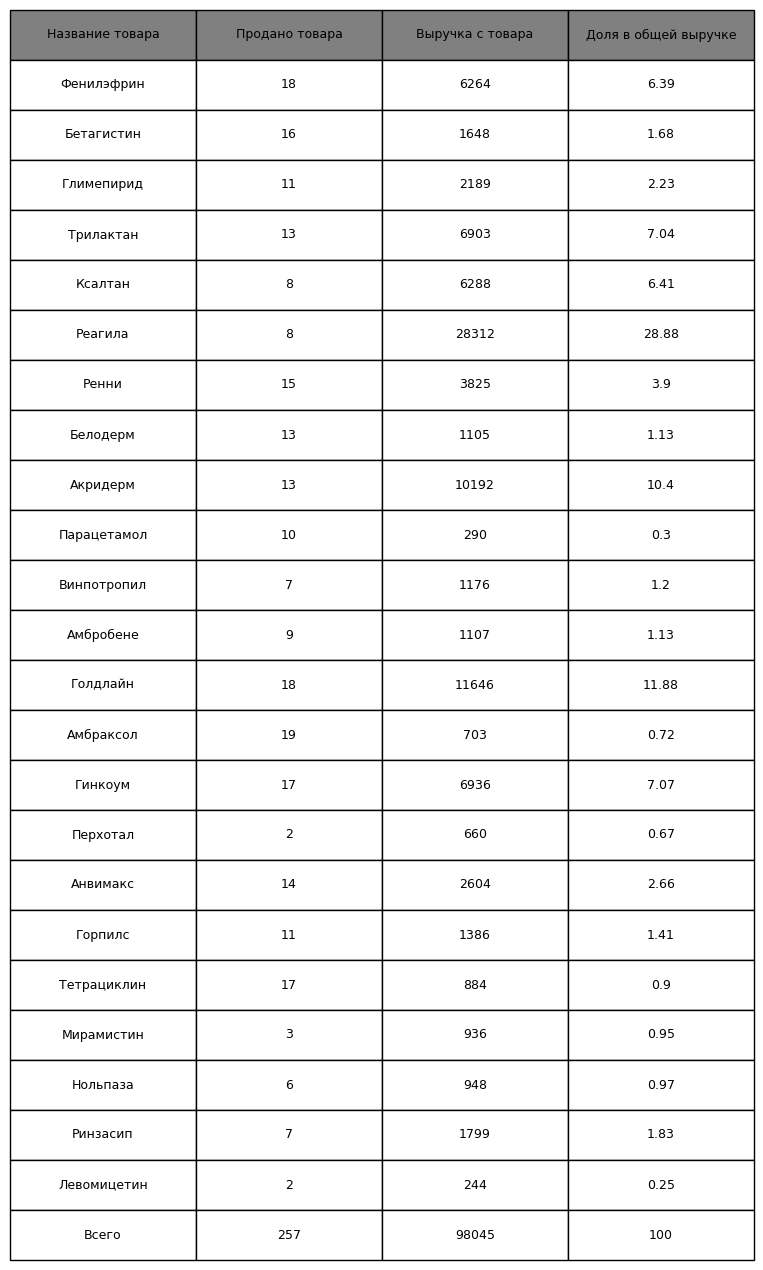

In [9]:
headings = ["Название товара", "Продано товара", "Выручка с товара", "Доля в общей выручке"]
fig, ax = plt.subplots()

data = []
for name in names:
    data.append([name, table_sales.get(name), table_revenue.get(name), round((table_revenue.get(name) / total_revenue) * 100, 2)])
data.append(["Всего", total_sales, total_revenue, "100"])

col_colours = ['gray', 'gray', 'gray', 'gray']

#create table
table = ax.table(cellText=data, loc='center', cellLoc='center', colLabels=headings, colColours=col_colours)

#modify table
table.auto_set_font_size(True)
table.scale (1.5, 3)
ax.axis('off')

plt.show() 

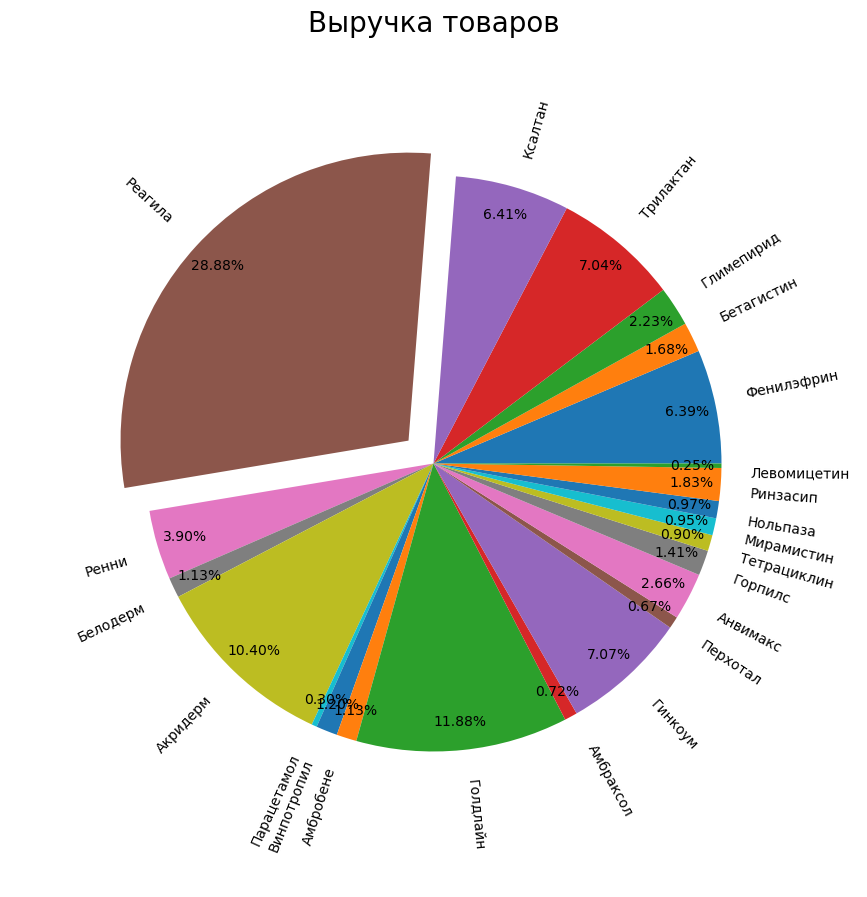

In [10]:
fig, ax = plt.subplots(figsize=(11, 11))
ax.pie(revenues, labels=names, autopct='%1.2f%%', pctdistance=0.9, rotatelabels=True, explode=explode_revenue, radius=0.85)
plt.title("Выручка товаров", size=20)
plt.show()

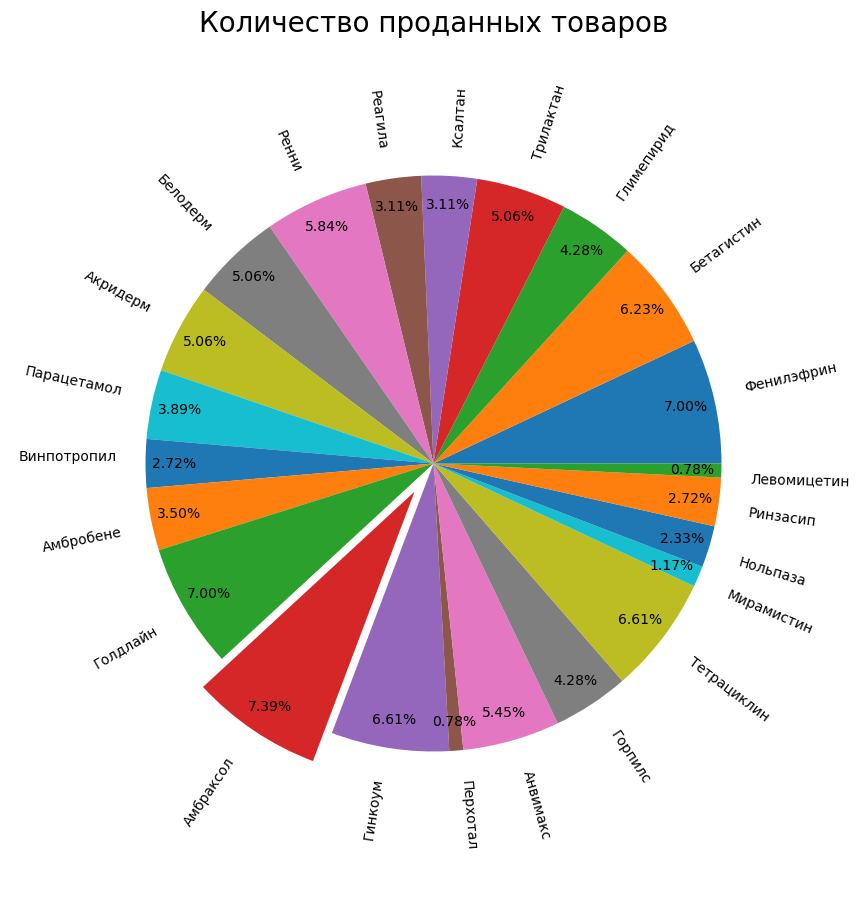

In [11]:
fig, ax = plt.subplots(figsize=(11, 11))
ax.pie(sales, labels=names, autopct='%1.2f%%', pctdistance=0.9, rotatelabels=True, explode=explode_sales, radius=0.85)
plt.title("Количество проданных товаров", size=20)
plt.show()